# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [48]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [49]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [44]:
df.describe() 

,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [50]:
df['gender'] = df['gender'].replace('male',0)
df['gender'] = df['gender'].replace('female',1)
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,37.0,10.00,no,3,18,7,4
1,0,1,27.0,4.00,no,4,14,6,4
2,0,1,32.0,15.00,yes,1,12,1,4
3,0,0,57.0,15.00,yes,5,18,6,5
4,0,0,22.0,0.75,no,2,17,6,3


In [55]:
df['children'] = df['children'].replace('no',0)
df['children'] = df['children'].replace('yes',1)

In [53]:
for i in range(len(df['affairs'])):
    if int(df['affairs'][i]) >= 1 :
        df['affairs'] = df['affairs'].replace(df['affairs'][i],'1')
        #print()
    else:
        df['affairs'] = df['affairs'].replace(df['affairs'][i],'0')
df.head()


,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,37.0,10.00,no,3,18,7,4
1,0,1,27.0,4.00,no,4,14,6,4
2,0,1,32.0,15.00,yes,1,12,1,4
3,0,0,57.0,15.00,yes,5,18,6,5
4,0,0,22.0,0.75,no,2,17,6,3


In [54]:
df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,37.0,10.00,no,3,18,7,4
1,0,1,27.0,4.00,no,4,14,6,4
2,0,1,32.0,15.00,yes,1,12,1,4
3,0,0,57.0,15.00,yes,5,18,6,5
4,0,0,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...
596,1,0,22.0,1.50,yes,1,12,2,5
597,1,1,32.0,10.00,yes,2,18,5,4
598,1,0,32.0,10.00,yes,2,17,6,5
599,1,0,22.0,7.00,yes,3,18,6,2


<Axes: >

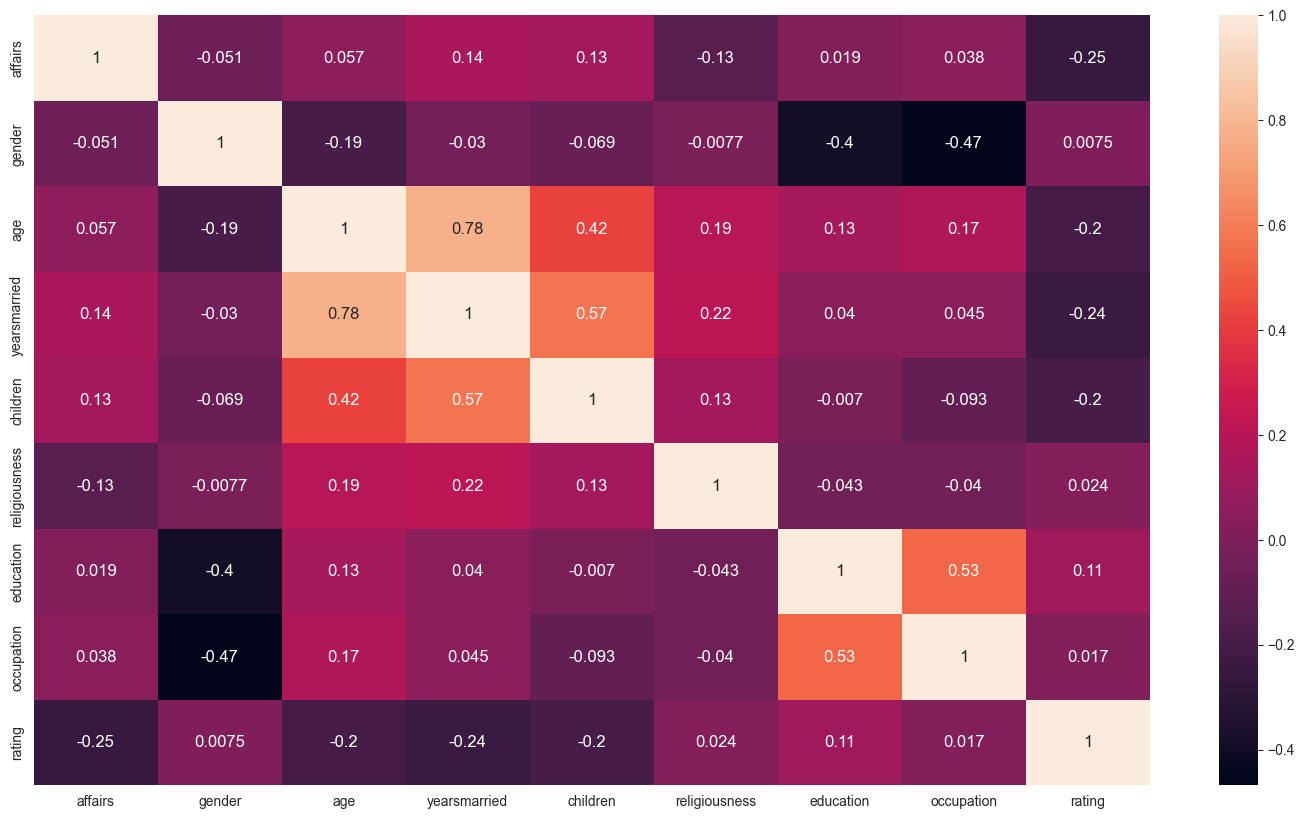

In [56]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})